# Day 3

## Part 1

- The missing engine part is the sum of all the part numbers in the schematic.
- Any number adjacent to a symbol (diagonal too) is a part number

In [24]:
from matplotlib import pyplot as plt
import numpy as np
from tqdm import tqdm

from advent_of_code_utils.advent_of_code_utils import (
    ParseConfig, parse_from_file, markdown
)

Text(0.5, 1.0, "Let's see what the problem is...")

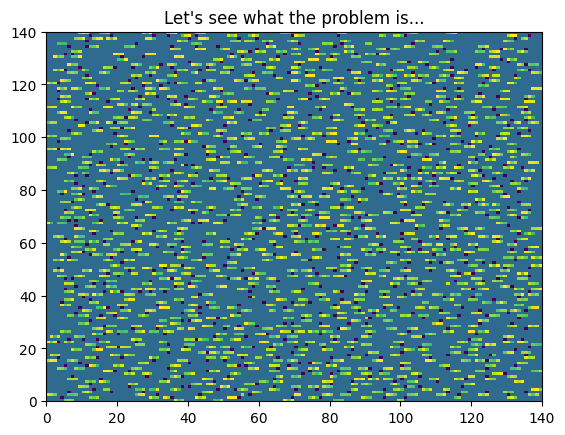

In [20]:
# first let's see what we're dealing with
def cast_input(character: str) -> int|str|None:
    """converts the puzzle input to more parsable types"""
    if character == '.':
        return -10
    try:
        return int(character)
    except ValueError:
        return -20

parser = ParseConfig('\n', ParseConfig('', cast_input))

plot_input = parse_from_file('puzzle_input\\day_3.txt', parser)

fig, ax = plt.subplots()
ax.pcolormesh(np.flipud(np.array(plot_input)))
ax.set_title('Let\'s see what the problem is...')

In [21]:
def cast_input(character: str) -> int|str|None:
    """converts the puzzle input to more parsable types"""
    if character == '.':
        return None
    try:
        return int(character)
    except ValueError:
        return character

parser = ParseConfig('\n', ParseConfig('', cast_input))

grid_input = parse_from_file('puzzle_input\\day_3.txt', parser)

In [25]:
# get the coordinates of all the symbols
symbol_coords = []
for y, row in tqdm(enumerate(grid_input)):
    for x, value in enumerate(row):
        if isinstance(value, str):
            symbol_coords.append((y, x))

140it [00:00, 15541.45it/s]


In [49]:
# find coords of adjacent numbers
digit_coords = []
for y, x in tqdm(symbol_coords):
    for dy in (-1, 0, 1):
        for dx in (-1, 0, 1):
            cx, cy = x + dx, y + dy
            if isinstance(grid_input[cy][cx], int):
                digit_coords.append((cy, cx))
            

100%|██████████| 731/731 [00:00<00:00, 88711.19it/s]


In [50]:
# scoop up the numbers
total_part_number = 0
already_counted = []
for y, x in tqdm(digit_coords):
    start = x
    while start >= 0:
        if isinstance(grid_input[y][start], int):
            start -= 1
        else:
            break
    char_x = start + 1
    if (y, char_x) in already_counted:
        continue
    already_counted.append((y, char_x))

    number_string = ''
    while char_x < len(grid_input[y]):
        value = grid_input[y][char_x]
        if isinstance(value, int):
            number_string += str(value)
        else:
            break
        char_x += 1

    total_part_number += int(number_string)


100%|██████████| 1691/1691 [00:00<00:00, 38736.67it/s]


In [51]:
markdown(
    '### Solution',
    f'The sum of all the part numbers is: {total_part_number}'
)

### Solution
The sum of all the part numbers is: 520135

In [60]:
from copy import deepcopy

- Gears in the schematic are any `*`s adjacent to exactly 2 part numbers
- The `gear ratio` is the product of those two numbers
- find the sum of all gear ratios

Let's just re-do the previous steps but filter out all but the symbols except the gears

Text(0.5, 1.0, 'Gear seems to be the problem!')

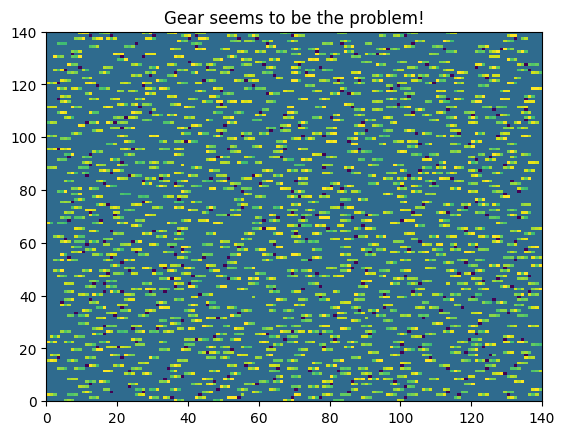

In [61]:
# create another plot with only the gears and numbers
def cast_input(character: str) -> int|str|None:
    """converts the puzzle input to more parsable types"""
    if character == '.':
        return -10
    try:
        return int(character)
    except ValueError:
        if character == '*':
            return -20
        else:
            return -10

parser = ParseConfig('\n', ParseConfig('', cast_input))

plot_input = parse_from_file('puzzle_input\\day_3.txt', parser)

fig, ax = plt.subplots()
ax.pcolormesh(np.flipud(np.array(plot_input)))
ax.set_title('Gear seems to be the problem!')

In [62]:
# get the coordinates of all the symbols
gear_coords = []
for y, row in tqdm(enumerate(grid_input)):
    for x, value in enumerate(row):
        if value == '*':
            gear_coords.append((y, x))

140it [00:00, 23397.32it/s]


In [67]:
# find coords of adjacent numbers
gear_digits = []
for y, x in tqdm(gear_coords):
    possible_digits = []
    adjacent = []
    for dy in (-1, 0, 1):
        adjacent.append([])
        possible_digits.append([])
        for dx in (-1, 0, 1):
            cx, cy = x + dx, y + dy
            if isinstance(grid_input[cy][cx], int):
                possible_digits[-1].append((cy, cx))
                adjacent[-1].append(True)
            else:
                adjacent[-1].append(False)
    
    # check how many part numbers are adjacent to the gear
    n_adjacent = 0
    digits = []
    for row, digit_row in zip(adjacent, possible_digits):
        # if one or all are ints then we've got one number
        if sum(row) in (1, 3):
            n_adjacent += 1
            digits.append(digit_row[0])
        # if 2 are ints...
        elif sum(row) == 2:
            # if the middle one is an int its one value
            if row[1]:
                n_adjacent += 1
                digits.append(digit_row[0])
            # else its 2 with a gap of space between
            else:
                n_adjacent += 2
                digits.extend([digit_row[0], digit_row[1]])
    
    if n_adjacent == 2:
        gear_digits.append(((y, x), deepcopy(digits)))
            

100%|██████████| 360/360 [00:00<00:00, 624979.07it/s]


In [72]:
# scoop up the numbers
total_gear_sum = 0
already_counted = []
for gear, digits in tqdm(gear_digits):
    product = 1
    for y, x in digits:
        start = x
        while start >= 0:
            if isinstance(grid_input[y][start], int):
                start -= 1
            else:
                break
        char_x = start + 1
        if (y, char_x) in already_counted:
            continue
        already_counted.append((y, char_x))

        number_string = ''
        while char_x < len(grid_input[y]):
            value = grid_input[y][char_x]
            if isinstance(value, int):
                number_string += str(value)
            else:
                break
            char_x += 1
        
        product *= int(number_string)

    total_gear_sum += product


100%|██████████| 323/323 [00:00<00:00, 25611.77it/s]


In [73]:
markdown(
    '### Solution',
    f'The sum of all the gear products is: {total_gear_sum}'
)

### Solution
The sum of all the gear products is: 72514855